<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/AAPL_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
key = ""

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = key )

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-03-28 00:00:00+00:00,143.80,144.04,140.62,140.91,33374805,33.937350,33.993991,33.186858,33.255299,133499220,0.0,1.0
1,AAPL,2017-03-29 00:00:00+00:00,144.12,144.49,143.19,143.68,29189955,34.012871,34.100193,33.793388,33.909030,116759820,0.0,1.0
2,AAPL,2017-03-30 00:00:00+00:00,143.93,144.50,143.50,144.19,21207252,33.968031,34.102553,33.866549,34.029392,84829008,0.0,1.0
3,AAPL,2017-03-31 00:00:00+00:00,143.66,144.27,143.01,143.72,19661651,33.904310,34.048272,33.750907,33.918470,78646604,0.0,1.0
4,AAPL,2017-04-03 00:00:00+00:00,143.70,144.12,143.05,143.71,19985714,33.913750,34.012871,33.760347,33.916110,79942856,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-03-21 00:00:00+00:00,165.38,166.35,163.015,163.51,89029269,165.38,166.35,163.015,163.51,89029269,0.0,1.0
1255,AAPL,2022-03-22 00:00:00+00:00,168.82,169.42,164.910,165.51,80979755,168.82,169.42,164.910,165.51,80979755,0.0,1.0
1256,AAPL,2022-03-23 00:00:00+00:00,170.21,172.64,167.650,167.99,98062674,170.21,172.64,167.650,167.99,98062674,0.0,1.0
1257,AAPL,2022-03-24 00:00:00+00:00,174.07,174.14,170.210,171.06,90131418,174.07,174.14,170.210,171.06,90131418,0.0,1.0
1258,AAPL,2022-03-25 00:00:00+00:00,174.72,175.28,172.750,173.88,80281664,174.72,175.28,172.750,173.88,80281664,0.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.8+ KB


In [10]:
import matplotlib.pyplot as plt

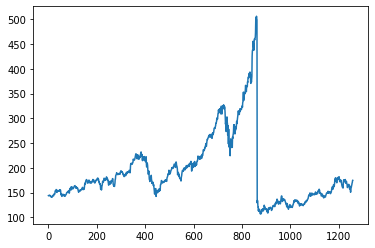

In [11]:
plt.plot(df['close'])

In [12]:
df[df['date'] == '2020-08-28 00:00:00+00:00']

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
862,AAPL,2020-08-28 00:00:00+00:00,499.23,505.77,498.31,504.05,46907479,123.671395,125.291512,123.443489,124.865426,187629916,0.0,1.0


In [13]:
df[df['date'] == '2020-08-31 00:00:00+00:00']

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
863,AAPL,2020-08-31 00:00:00+00:00,129.04,131.0,126.0,127.58,223505733,127.865367,129.807526,124.85304,126.418657,223505733,0.0,4.0


In [14]:
df1 = df[['close']]

In [15]:
df_b_split = df1.iloc[:863]

In [16]:
df_a_split = df1.iloc[863:] *4

In [17]:
df2 = pd.concat([df_b_split, df_a_split])

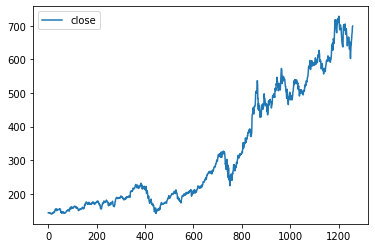

In [19]:
df2.plot()

In [22]:
split = int(1259 * 0.8)
train = df2[:split]
test = df2[split:]

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [24]:
scaled_train.shape

(1007, 1)

In [25]:
scaled_test.shape

(252, 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df2)

In [21]:
import tensorflow as tf

In [22]:
window_size = 120
buffer_size = 600
batch_size = 50

In [28]:
data = tf.data.Dataset.from_tensor_slices(scaled_train)
data = data.window(window_size+1,shift=1, drop_remainder=True)
data = data.flat_map(lambda w:w.batch(window_size+1))
data = data.shuffle(buffer_size).map(lambda x:(x[:-1], x[-1]))
data = data.batch(batch_size).prefetch(1)

In [29]:
data_test = tf.data.Dataset.from_tensor_slices(scaled_test)
data_test = data_test.window(window_size+1,shift=1, drop_remainder=True)
data_test = data_test.flat_map(lambda w:w.batch(window_size+1))
data_test = data_test.shuffle(buffer_size).map(lambda x:(x[:-1], x[-1]))
data_test = data_test.batch(batch_size).prefetch(1)

In [23]:
data = tf.data.Dataset.from_tensor_slices(scaled_df)
data = data.window(window_size+1,shift=1, drop_remainder=True)
data = data.flat_map(lambda w:w.batch(window_size+1))
data = data.shuffle(buffer_size).map(lambda x:(x[:-1], x[-1]))
data = data.batch(batch_size).prefetch(1)

In [24]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model = Sequential()

model.add(Bidirectional(LSTM(32, return_sequences=True), input_shape=[None, 1]))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, None, 64)         8704      
 nal)                                                            
                                                                 
 lstm_10 (LSTM)              (None, None, 32)          12416     
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                      

In [35]:
model.fit(data, epochs=500, verbose=0)

In [36]:
his = model.history.history

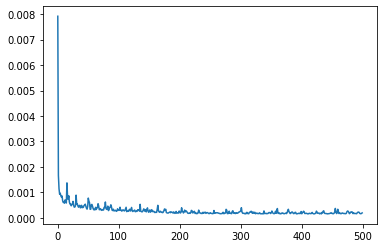

In [37]:
plt.plot(his['mse'])

In [38]:
pred = model.predict(scaled_df)

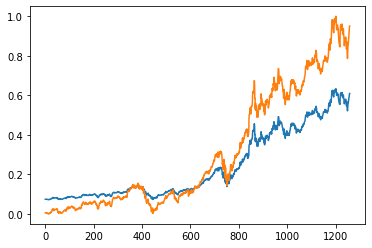

In [47]:
plt.plot(pred)
plt.plot(scaled_df)

In [40]:
scaled_df.shape

(1259, 1)

In [49]:
print(scaled_df[1258:])
print(scaled_df[-1])

[[0.95035413]]
[0.95035413]


In [55]:
last_predict = []

def predict_val ():
  n = 0
  first = scaled_df[1258:] 
  while n!=10:
    n = n + 1
    pred = model.predict(first)
    last_predict.append(pred)
    first = pred


In [56]:
predict_val()

In [62]:
import numpy as np

In [64]:
predict = np.array(last_predict)

In [66]:
predict.shape

(10, 1, 1)

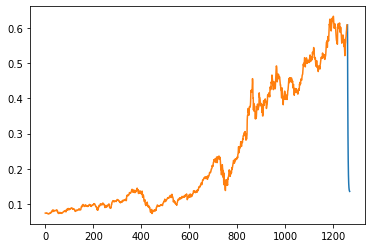

In [77]:
plt.plot(range(1260,1270), predict[:,0,0])
plt.plot(pred)